In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 한글 문제
# matplotlit의 기본 폰트에서 한글 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"

    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [4]:
# 셀 자동 펼치기
from IPython.display import display, Javascript

# 모든 출력을 펼치는 JavaScript 코드
javascript = """
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}
"""

# JavaScript 코드 실행
display(Javascript(javascript))

<IPython.core.display.Javascript object>

# 1. 행정동 & 상권 분석

## 1) 행정동 분석

### 전처리

In [5]:
# 파일명 리스트
file_names = [
    '서울시 상권분석서비스(길단위인구-행정동).csv',
    '서울시 상권분석서비스(상주인구-행정동).csv',
    '서울시 상권분석서비스(소득소비-행정동).csv',
    '서울시 상권분석서비스(점포-행정동).csv',
    '서울시 상권분석서비스(추정매출-행정동).csv',
    '서울시 상권분석서비스(영역-행정동).csv']

# 데이터프레임 리스트 초기화
df_list = []

# 각 파일명에 대해 반복
for file_name in file_names:
    # 파일 경로 생성 및 데이터 불러오기
    df = pd.read_csv(f'./data/{file_name}', dtype=str, encoding='CP949')

    # '행정동_코드'가 '1144'로 시작하는 행 필터링
    filtered_df = df[df['행정동_코드'].str.startswith('1144')]

    # '기준_년분기_코드' 컬럼이 있으면 해당 조건도 적용
    if '기준_년분기_코드' in df.columns:
        filtered_df = filtered_df[filtered_df['기준_년분기_코드'] == '20232']

    # '점포-행정동' 또는 '추정매출-행정동' 파일인 경우 '커피-음료' 업종으로 필터링
    if '점포-행정동' in file_name or '추정매출-행정동' in file_name:
        filtered_df = filtered_df[filtered_df['서비스_업종_코드_명'] == '커피-음료']

    # 데이터프레임 리스트에 추가
    df_list.append(filtered_df)

# 각 데이터프레임에 이름 할당
dong_load, dong_pop, dong_consumption, dong_store, dong_sales, dong_area = df_list

# 데이터 엑셀로 출력
with pd.ExcelWriter('서울_행정동_데이터.xlsx') as writer:
    for df, sheet_name in zip(df_list, file_names):
        df.to_excel(writer, sheet_name=sheet_name, index=False)

In [6]:
dong_area.head(20)

,행정동_코드,행정동_명,엑스좌표_값,와이좌표_값,영역_면적
194,11440555,아현동,195823,450258,744328
195,11440565,공덕동,196284,449979,1019197
196,11440585,도화동,195502,448794,625018
200,11440700,망원2동,191180,451056,676411
201,11440710,연남동,193068,451501,647438
202,11440720,성산1동,192211,451389,859254
203,11440730,성산2동,191339,452092,1978724
204,11440740,상암동,189390,452361,8402415
237,11440590,용강동,194893,449115,790602
238,11440600,대흥동,194833,450283,858570


In [7]:
dong_load['총_유동인구_수'] = dong_load['총_유동인구_수'].astype('int64')
dong_load = dong_load[['행정동_코드_명', '총_유동인구_수']].sort_values('총_유동인구_수',ascending=True).reset_index(drop=True)


dong_load.head(20)

,행정동_코드_명,총_유동인구_수
0,도화동,3441313
1,신수동,5142005
2,염리동,5281206
3,합정동,5292528
4,상암동,5438986
5,망원2동,5791293
6,용강동,5872914
7,서강동,6062111
8,성산1동,6222642
9,연남동,6559528


In [8]:
dong_pop['총_상주인구_수'] = dong_pop['총_상주인구_수'].astype('int64')
dong_pop = dong_pop[['행정동_코드_명', '총_상주인구_수']].sort_values('총_상주인구_수', ascending=False).reset_index(drop=True)

dong_pop.head(20)

,행정동_코드_명,총_상주인구_수
0,공덕동,37133
1,성산2동,36249
2,상암동,33829
3,서강동,25284
4,서교동,24372
5,도화동,22198
6,망원1동,21608
7,아현동,21498
8,신수동,21438
9,용강동,20469


In [9]:
dong_consumption['월_평균_소득_금액'] = dong_consumption['월_평균_소득_금액'].astype('int64')
dong_consumption = dong_consumption[['행정동_코드_명', '월_평균_소득_금액']].sort_values('월_평균_소득_금액', ascending=False).reset_index(drop=True)

dong_consumption.head(20)

,행정동_코드_명,월_평균_소득_금액
0,아현동,5237419
1,용강동,4787212
2,서강동,4339738
3,도화동,4217433
4,상암동,4158486
5,신수동,4157605
6,염리동,4051438
7,공덕동,4047702
8,성산2동,3521472
9,대흥동,3421062


In [10]:
dong_store['점포_수'] = dong_store['점포_수'].astype('int64')
dong_store = dong_store[dong_store['서비스_업종_코드_명'] == '커피-음료']
dong_store = dong_store[['행정동_코드_명', '점포_수']].sort_values('점포_수', ascending=False).reset_index(drop=True)

dong_store.head(20)

,행정동_코드_명,점포_수
0,서교동,538
1,연남동,266
2,합정동,144
3,상암동,119
4,망원1동,117
5,서강동,111
6,대흥동,62
7,성산1동,62
8,망원2동,51
9,공덕동,50


In [11]:
dong_sales['당월_매출_금액'] = dong_sales['당월_매출_금액'].astype('int64')
dong_sales = dong_sales[dong_sales['서비스_업종_코드_명'] == '커피-음료']
dong_sales = dong_sales[['행정동_코드_명', '당월_매출_금액']].sort_values('당월_매출_금액', ascending=False).reset_index(drop=True)

dong_sales.head(20)

,행정동_코드_명,당월_매출_금액
0,서교동,28592870633
1,상암동,8724653026
2,합정동,7170448661
3,연남동,5188296854
4,도화동,3563226373
5,서강동,3546383301
6,성산2동,3499199413
7,망원1동,2055714128
8,대흥동,1859200503
9,염리동,1244001369


### 그래프 시각화

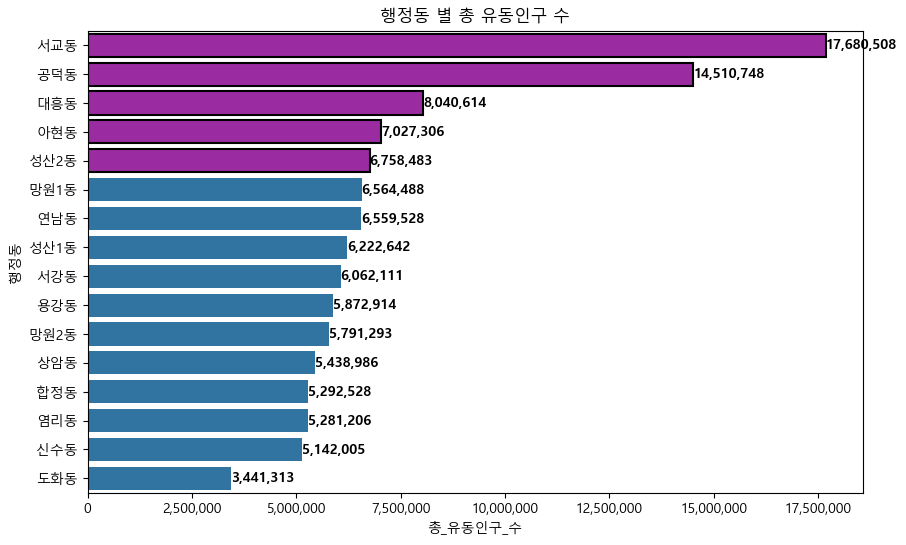

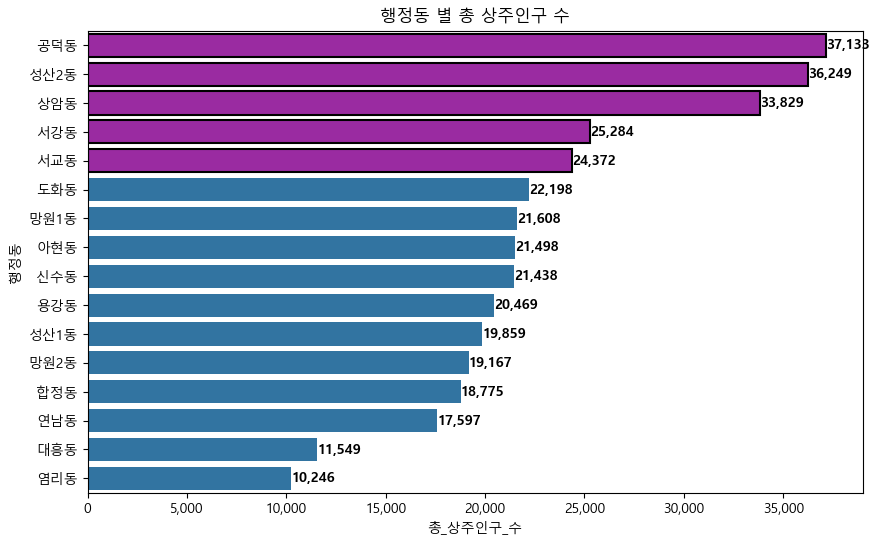

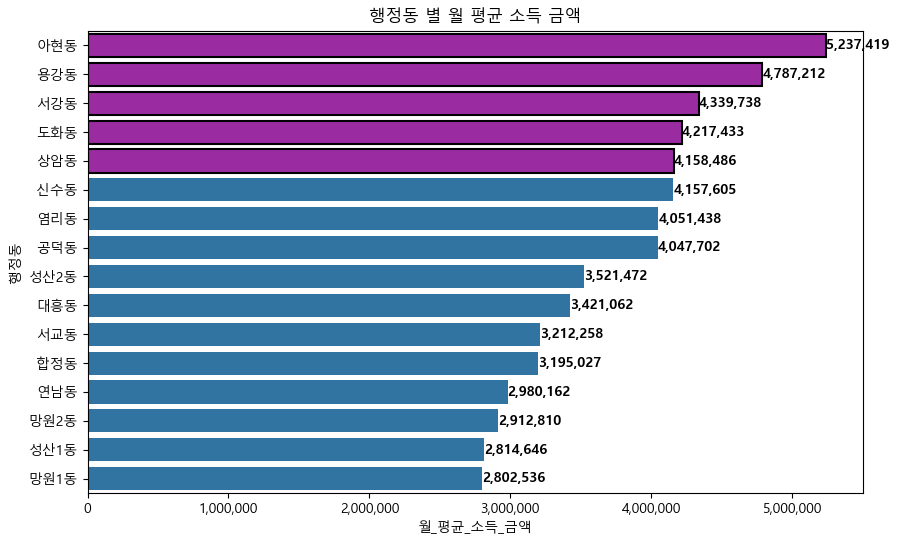

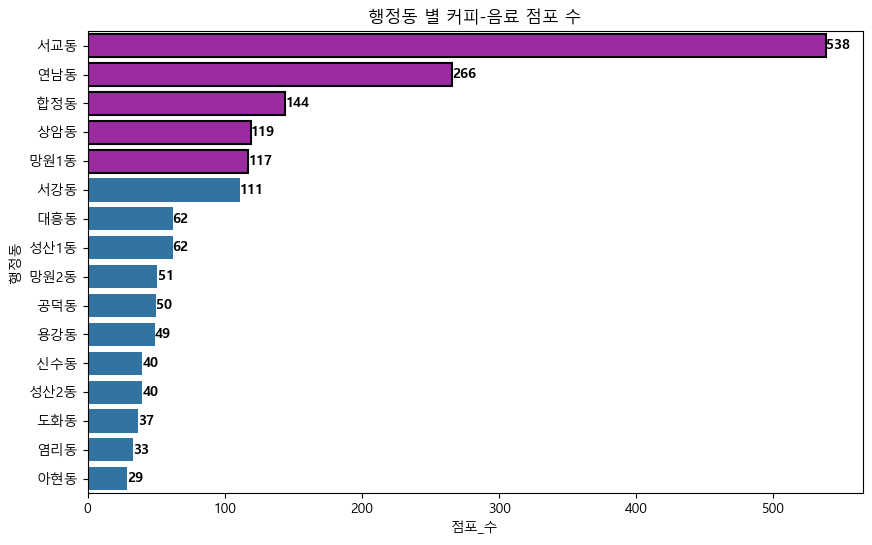

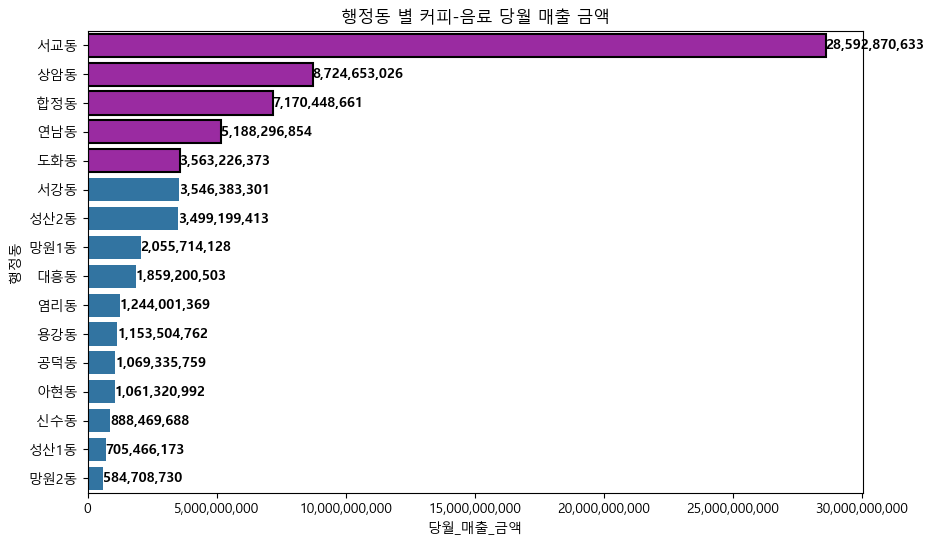

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import ticker

# 각 데이터프레임 및 필요한 정보를 리스트 형태로 준비
dataframes = [dong_load, dong_pop, dong_consumption, dong_store, dong_sales]
columns = ['총_유동인구_수', '총_상주인구_수', '월_평균_소득_금액',
           '점포_수', '당월_매출_금액']

# 각 데이터 프레임의 지정된 컬럼들의 데이터 타입을 int로 변경
for df in dataframes:
    for col in columns:
        if col in df.columns:
            df[col] = df[col].astype('int64')

titles = ['행정동 별 총 유동인구 수', '행정동 별 총 상주인구 수', '행정동 별 월 평균 소득 금액',
          '행정동 별 커피-음료 점포 수', '행정동 별 커피-음료 당월 매출 금액']

# 각 데이터프레임에 대해 바 차트 생성
for df, col, title in zip(dataframes, columns, titles):
    plt.figure(figsize=(10, 6))
    barplot = sns.barplot(x=col, y='행정동_코드_명', data=df, order=df.sort_values(col, ascending=False)['행정동_코드_명'])
    plt.title(title)
    plt.xlabel(col)
    plt.ylabel('행정동')
    plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    for i, bar in enumerate(barplot.patches):
        plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height() / 2,
                 f'{bar.get_width():,.0f}',
                 ha='left', va='center', fontweight='bold', color='black')
        if i < 5:
            bar.set_edgecolor('black')
            bar.set_linewidth(1.5)
            bar.set_facecolor('#9A2BA1')


    filename = f"{title}.png"
    plt.savefig(filename)
#      plt.close()

plt.show()

### 상관관계 분석

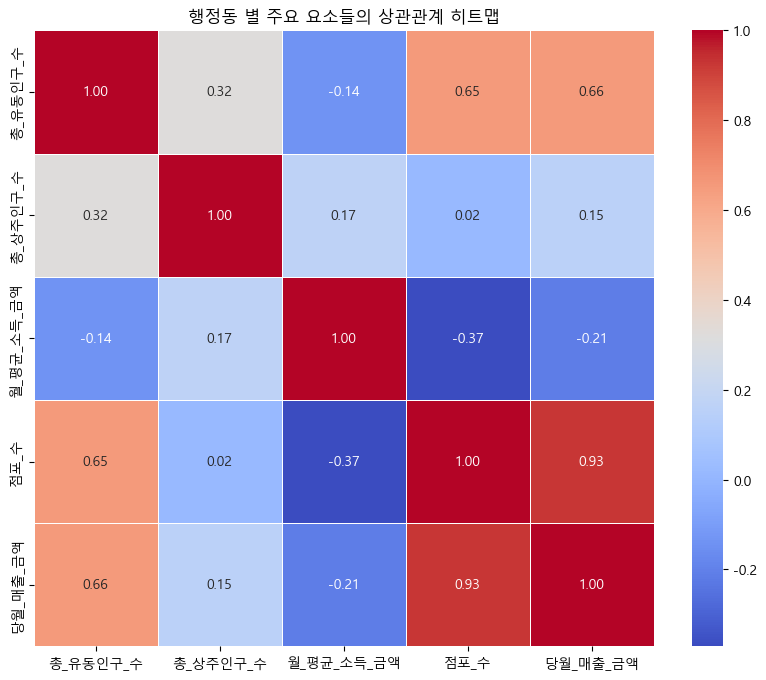

In [77]:
# 엑셀 파일의 모든 시트를 읽어서 각 시트에서 필요한 컬럼을 추출
all_sheets = pd.read_excel('./서울_행정동_데이터.xlsx', sheet_name=None)

# 필요한 컬럼 목록
required_columns = ['행정동_코드_명', '총_유동인구_수', '총_상주인구_수', '월_평균_소득_금액', '점포_수', '당월_매출_금액']

# 각 시트에서 필요한 컬럼을 추출하고 하나의 데이터프레임으로 합치기
combined_data = pd.DataFrame()
for sheet_name, sheet_data in all_sheets.items():
    selected_columns = sheet_data.columns.intersection(required_columns)
    if not selected_columns.empty:
        combined_data = pd.concat([combined_data, sheet_data[selected_columns]])

# '행정동_코드_명' 별로 그룹화하여 평균을 계산
grouped_data_dong = combined_data.groupby('행정동_코드_명', as_index=False).mean()

# 상관관계 계산
correlation_matrix = grouped_data_dong.corr(numeric_only=True)

# 상관관계 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('행정동 별 주요 요소들의 상관관계 히트맵')
plt.show()

In [78]:
# 상관관계가 0.7 이상의 높은 열 생성
# 0.65의 2가지도 사용

# '점포 당 매출금액' 계산 및 추가 : 0.93
grouped_data_dong['점포_당_매출금액'] = grouped_data_dong['당월_매출_금액'] / grouped_data_dong['점포_수']

# '유동인구 당 매출금액' 계산 및 추가 : 0.66
grouped_data_dong['유동인구_당_매출금액'] = grouped_data_dong['당월_매출_금액'] / grouped_data_dong['총_유동인구_수']

# '점포 당 유동인구수' 계산 및 추가 : 0.65
grouped_data_dong['점포_당_유동인구수'] = grouped_data_dong['총_유동인구_수'] / grouped_data_dong['점포_수']

# 결과 확인
grouped_data_dong

,행정동_코드_명,총_유동인구_수,총_상주인구_수,월_평균_소득_금액,점포_수,당월_매출_금액,점포_당_매출금액,유동인구_당_매출금액,점포_당_유동인구수
0,공덕동,14510748.0,37133.0,4047702.0,50.0,1.069336e+09,2.138672e+07,73.692670,290214.960000
1,대흥동,8040614.0,11549.0,3421062.0,62.0,1.859201e+09,2.998710e+07,231.226185,129687.322581
2,도화동,3441313.0,22198.0,4217433.0,37.0,3.563226e+09,9.630342e+07,1035.426412,93008.459459
3,망원1동,6564488.0,21608.0,2802536.0,117.0,2.055714e+09,1.757021e+07,313.156811,56106.735043
4,망원2동,5791293.0,19167.0,2912810.0,51.0,5.847087e+08,1.146488e+07,100.963417,113554.764706
5,상암동,5438986.0,33829.0,4158486.0,119.0,8.724653e+09,7.331641e+07,1604.095511,45705.764706
6,서강동,6062111.0,25284.0,4339738.0,111.0,3.546383e+09,3.194940e+07,585.007978,54613.612613
7,서교동,17680508.0,24372.0,3212258.0,538.0,2.859287e+10,5.314660e+07,1617.197347,32863.397770
8,성산1동,6222642.0,19859.0,2814646.0,62.0,7.054662e+08,1.137849e+07,113.370844,100365.193548
9,성산2동,6758483.0,36249.0,3521472.0,40.0,3.499199e+09,8.747999e+07,517.749236,168962.075000


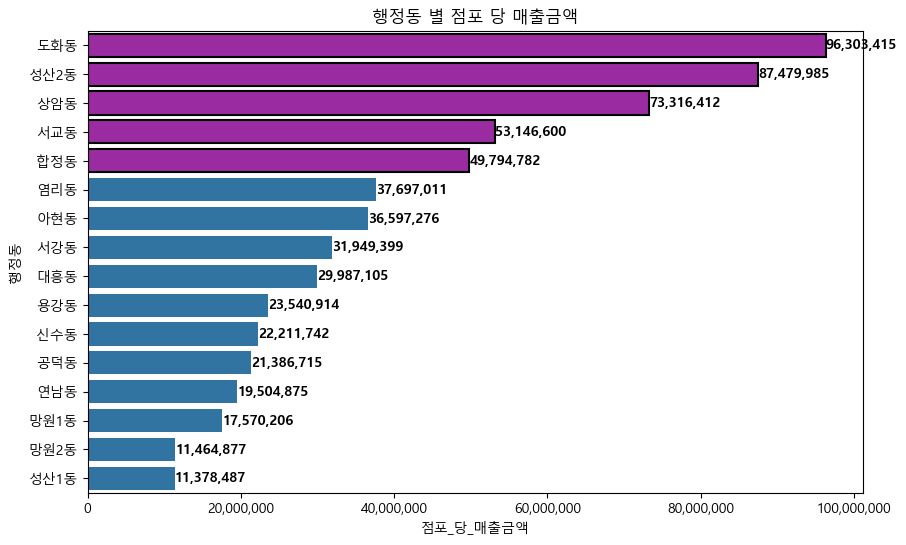

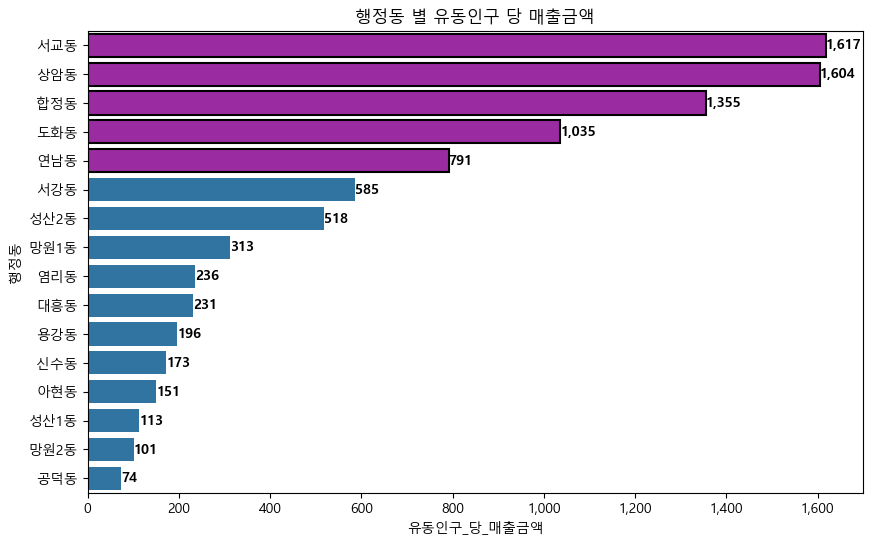

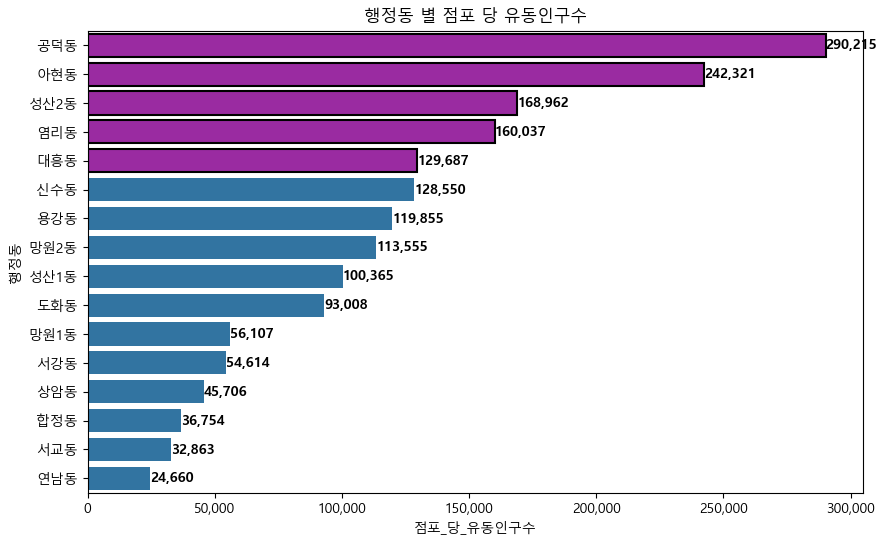

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import ticker

# 각 데이터프레임 및 필요한 정보를 리스트 형태로 준비
dataframes = [grouped_data_dong] * 3
columns = ['점포_당_매출금액', '유동인구_당_매출금액', '점포_당_유동인구수']
titles = ['행정동 별 점포 당 매출금액', '행정동 별 유동인구 당 매출금액', '행정동 별 점포 당 유동인구수']

# 각 데이터프레임에 대해 바 차트 생성
for df, col, title in zip(dataframes, columns, titles):
    plt.figure(figsize=(10, 6))
    barplot = sns.barplot(x=col, y='행정동_코드_명', data=df, order=df.sort_values(col, ascending=False)['행정동_코드_명'])
    plt.title(title)
    plt.xlabel(col)
    plt.ylabel('행정동')
    plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    for i, bar in enumerate(barplot.patches):
        plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height() / 2,
                 f'{bar.get_width():,.0f}',
                 ha='left', va='center', fontweight='bold', color='black')
        if i < 5:
            bar.set_edgecolor('black')
            bar.set_linewidth(1.5)
            bar.set_facecolor('#9A2BA1')


    filename = f"{title}.png"
    plt.savefig(filename)
#      plt.close()

plt.show()

---

## 2) 상권분석

### 전처리

In [14]:
# '영역-상권' CSV 파일을 읽어 마포구 데이터 필터링
area_df = pd.read_csv('./data/서울시 상권분석서비스(영역-상권).csv', dtype=str, encoding='CP949')
market_area = area_df[area_df['자치구_코드_명'] == '마포구']

# 마포구 데이터에서 고유한 '상권코드명' 추출
unique_market_codes = market_area['상권_코드_명'].unique()

# CSV 파일명 리스트 (영역-상권 파일 제외)
file_names = [
    '서울시 상권분석서비스(길단위인구-상권).csv',
    '서울시 상권분석서비스(상주인구-상권).csv',
    '서울시 상권분석서비스(소득소비-상권).csv',
    '서울시 상권분석서비스(점포-상권).csv',
    '서울시 상권분석서비스(추정매출-상권).csv']

# 데이터프레임 리스트 초기화
df_list = []

# 파일명을 순회하면서 데이터를 읽고 '상권_코드_명'에 따라 필터링
for file_name in file_names:
    # CSV 파일 읽기
    df = pd.read_csv(f'./data/{file_name}', dtype=str, encoding='CP949')


    # '상권코드명'으로 데이터 필터링
    filtered_df = df[df['상권_코드_명'].isin(unique_market_codes)]

    if '기준_년분기_코드' in df.columns:
        filtered_df = filtered_df[filtered_df['기준_년분기_코드'] == '20232']

    # '점포-상권' 또는 '추정매출-상권' 파일인 경우 '커피-음료' 업종으로 필터링
    if '점포-상권' in file_name or '추정매출-상권' in file_name:
        filtered_df = filtered_df[filtered_df['서비스_업종_코드_명'] == '커피-음료']

    # 결과 저장
    df_list.append(filtered_df)

# 결과 데이터프레임 할당
market_load, market_pop, market_consumption, market_store, market_sales = df_list

# 데이터 엑셀로 출력
with pd.ExcelWriter('서울_상권_데이터.xlsx') as writer:
    for df, sheet_name in zip(df_list, file_names):
        df.to_excel(writer, sheet_name=sheet_name, index=False)

In [15]:
market_area

,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,엑스좌표_값,와이좌표_값,자치구_코드,자치구_코드_명,행정동_코드,행정동_코드_명,영역_면적
427,A,골목상권,3110566,경의선책거리,193685,450750,11440,마포구,11440660,서교동,156743
428,A,골목상권,3110542,마포구청역 7번,191345,451292,11440,마포구,11440700,망원2동,123656
429,A,골목상권,3110543,중암중학교,191421,452638,11440,마포구,11440730,성산2동,21216
430,A,골목상권,3110544,망리단길,191619,450607,11440,마포구,11440690,망원1동,311648
431,A,골목상권,3110545,마포구청역 1번,191544,451746,11440,마포구,11440730,성산2동,87346
...,...,...,...,...,...,...,...,...,...,...,...
1599,R,전통시장,3130197,마포시장,195890,449503,11440,마포구,11440565,공덕동,9701
1600,R,전통시장,3130198,아현시장,195969,450765,11440,마포구,11440555,아현동,27671
1623,R,전통시장,3130191,홍대 걷고싶은 거리,193388,450714,11440,마포구,11440660,서교동,58130
1624,R,전통시장,3130192,동진시장,193538,451420,11440,마포구,11440710,연남동,4091


In [16]:
market_load['총_유동인구_수'] = market_load['총_유동인구_수'].astype('int64')
market_load = market_load[['상권_코드_명', '총_유동인구_수']].sort_values('총_유동인구_수',ascending=False).reset_index(drop=True)

market_load

,상권_코드_명,총_유동인구_수
0,연남동(홍대),4861686
1,망리단길,4603945
2,홍대입구역(홍대),4227814
3,경성고등학교,3055029
4,대흥역 2번,2586337
...,...,...
72,동진시장,51099
73,영진시장,49227
74,공덕시장,33440
75,월드컵경기장역(월드컵경기장),9585


In [17]:
market_pop['총_상주인구_수'] = market_pop['총_상주인구_수'].astype('int64')
market_pop = market_pop[['상권_코드_명', '총_상주인구_수']].sort_values('총_상주인구_수',ascending=False).reset_index(drop=True)

market_pop

,상권_코드_명,총_상주인구_수
0,망리단길,13911
1,연남동(홍대),8655
2,경성고등학교,8634
3,합정역 8번,6202
4,마포구청역 7번,5409
...,...,...
69,마포시장,78
70,신수시장,72
71,서교시장,37
72,동진시장,33


In [18]:
market_consumption['월_평균_소득_금액'] = market_consumption['월_평균_소득_금액'].astype('int64')
market_consumption = market_consumption[['상권_코드_명', '월_평균_소득_금액']].sort_values('월_평균_소득_금액',ascending=False).reset_index(drop=True)

market_consumption

,상권_코드_명,월_평균_소득_금액
0,용강동 상점가,5324450
1,공덕역(공덕오거리),5318880
2,KB국민은행 서강지점,5088849
3,염리초등학교,4980975
4,마포역,4775524
...,...,...
70,이대역 5번,2338936
71,만리재,2331968
72,마포경찰서,1844644
73,공덕시장,1755851


In [19]:
market_store = market_store[market_store['서비스_업종_코드_명'] == '커피-음료']
market_store['점포_수'] = market_store['점포_수'].astype('int64')
market_store = market_store[['상권_코드_명', '점포_수']].sort_values('점포_수',ascending=False).reset_index(drop=True)

market_store

,상권_코드_명,점포_수
0,홍대입구역(홍대),216
1,연남동(홍대),179
2,망리단길,91
3,DMC(디지털미디어시티),72
4,경의선책거리,63
...,...,...
69,공덕래미안3차아파트,1
70,신수시장,1
71,서강대학교,0
72,아현역 4번,0


In [20]:
market_sales = market_sales[market_sales['서비스_업종_코드_명'] == '커피-음료']
market_sales['당월_매출_금액'] = market_sales['당월_매출_금액'].astype('int64')
market_sales = market_sales[['상권_코드_명', '당월_매출_금액']].sort_values('당월_매출_금액',ascending=False).reset_index(drop=True)

market_sales

,상권_코드_명,당월_매출_금액
0,홍대입구역(홍대),13769420595
1,연남동(홍대),8253288499
2,DMC(디지털미디어시티),5951689777
3,합정역,3992225473
4,상수역(홍대),2847380148
5,성산중학교,2730799513
6,공덕역(공덕오거리),2716523620
7,경의선책거리,2234239439
8,홍대 걷고싶은 거리,2218866128
9,상암동상점가,2200248267


In [21]:
### 그래프

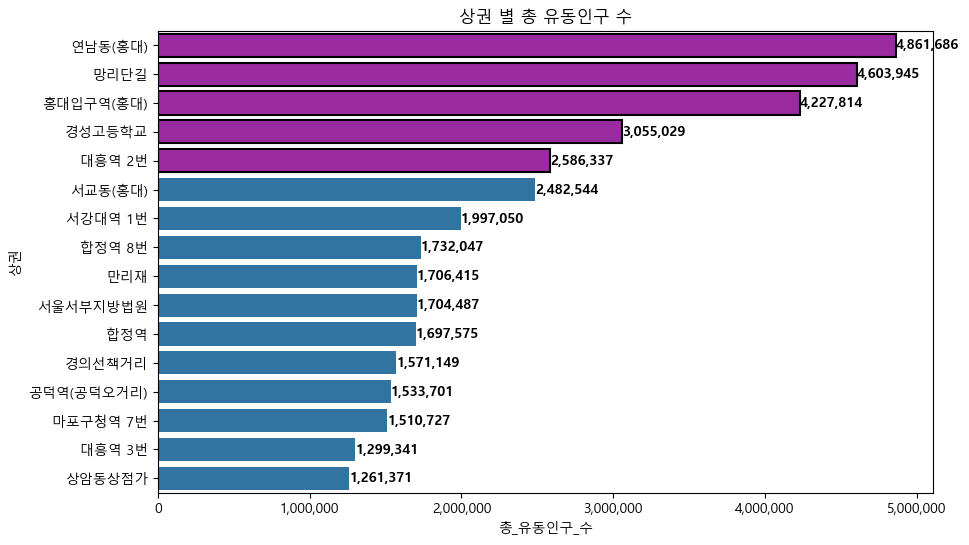

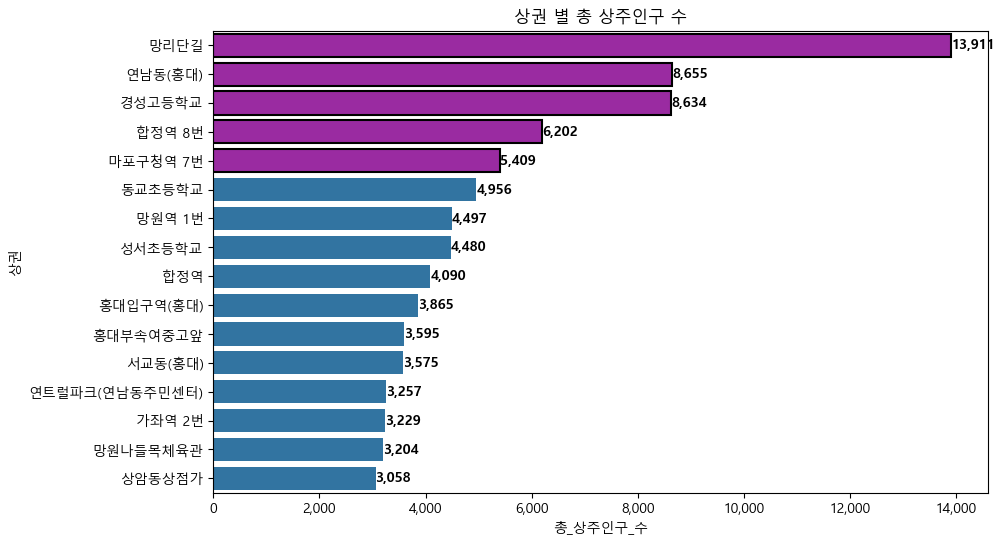

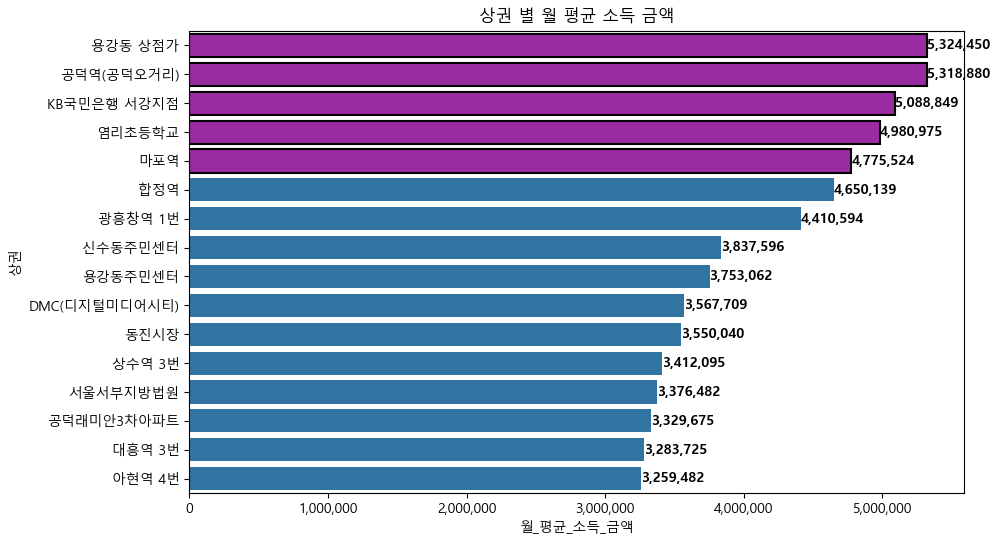

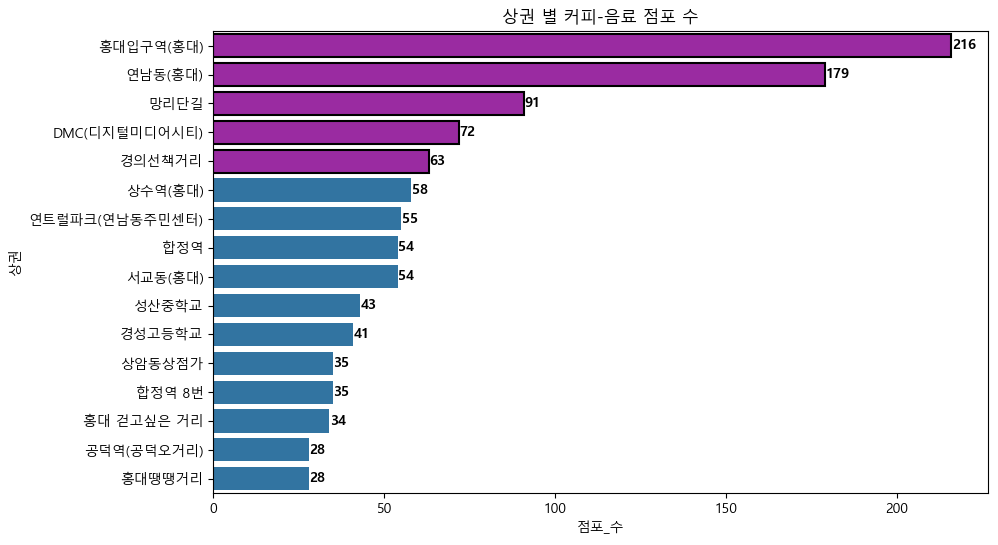

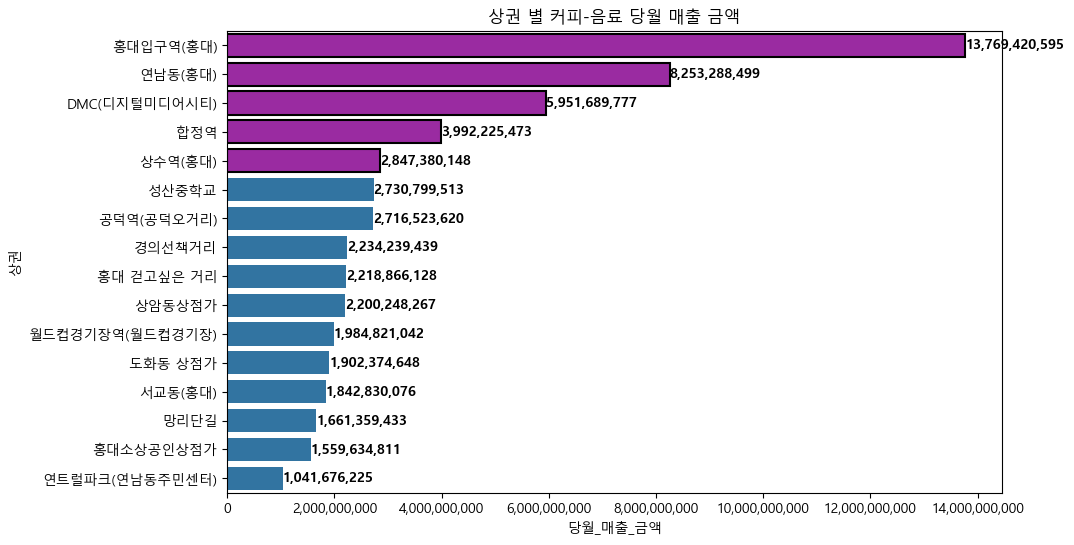

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import ticker

# 각 데이터프레임 및 필요한 정보를 리스트 형태로 준비
dataframes = [market_load, market_pop, market_consumption, market_store, market_sales]
columns = ['총_유동인구_수', '총_상주인구_수', '월_평균_소득_금액',
           '점포_수', '당월_매출_금액']

# 각 데이터 프레임의 지정된 컬럼들의 데이터 타입을 int로 변경
for df in dataframes:
    for col in columns:
        if col in df.columns:
            df[col] = df[col].astype('int64')

titles = ['상권 별 총 유동인구 수', '상권 별 총 상주인구 수', '상권 별 월 평균 소득 금액',
          '상권 별 커피-음료 점포 수', '상권 별 커피-음료 당월 매출 금액']

# 각 데이터프레임에 대해 바 차트 생성
for df, col, title in zip(dataframes, columns, titles):
    plt.figure(figsize=(10, 6))
    sorted_df = df.sort_values(col, ascending=False).head(16)  # 상위 16개 데이터만 선택
    barplot = sns.barplot(x=col, y='상권_코드_명', data=sorted_df)
    # barplot = sns.barplot(x=col, y='상권_코드_명', data=df, order=df.sort_values(col, ascending=False)['상권_코드_명'])
    plt.title(title)
    plt.xlabel(col)
    plt.ylabel('상권')
    plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    for i, bar in enumerate(barplot.patches):
        plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height() / 2,
                 f'{bar.get_width():,.0f}',
                 ha='left', va='center', fontweight='bold', color='black')
        if i < 5:
            bar.set_edgecolor('black')
            bar.set_linewidth(1.5)
            bar.set_facecolor('#9A2BA1')


    filename = f"{title}.png"
    plt.savefig(filename)
#      plt.close()

plt.show()

### 상관관계 분석

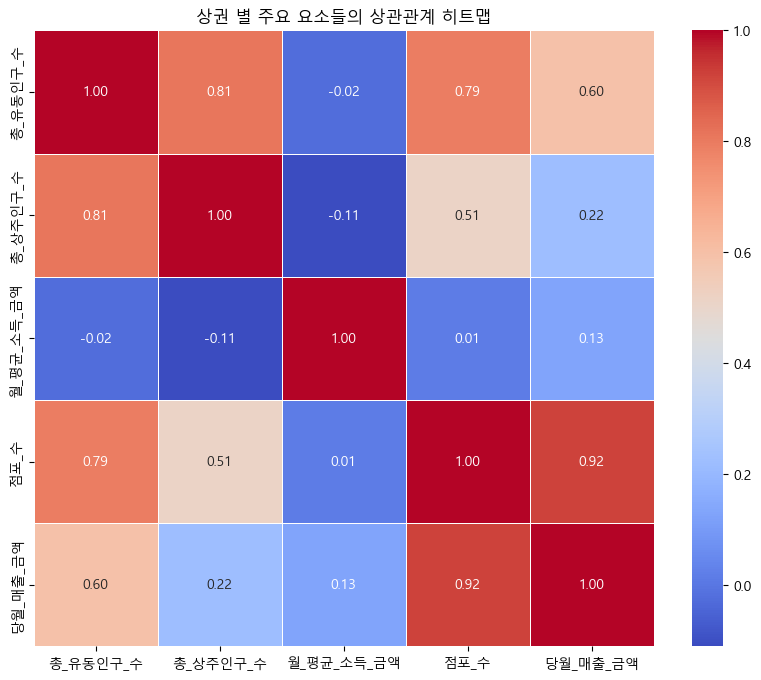

In [75]:
# 엑셀 파일의 모든 시트를 읽어서 각 시트에서 필요한 컬럼을 추출
all_sheets = pd.read_excel('./서울_상권_데이터.xlsx', sheet_name=None)

# 필요한 컬럼 목록
required_columns = ['상권_코드_명', '총_유동인구_수', '총_상주인구_수', '월_평균_소득_금액', '점포_수', '당월_매출_금액']

# 각 시트에서 필요한 컬럼을 추출하고 하나의 데이터프레임으로 합치기
combined_data = pd.DataFrame()
for sheet_name, sheet_data in all_sheets.items():
    selected_columns = sheet_data.columns.intersection(required_columns)
    if not selected_columns.empty:
        combined_data = pd.concat([combined_data, sheet_data[selected_columns]])

# '상권_코드_명' 별로 그룹화하여 평균을 계산
grouped_data_market = combined_data.groupby('상권_코드_명', as_index=False).mean()

# 상관관계 계산
correlation_matrix = grouped_data_market.corr(numeric_only=True)

# 상관관계 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('상권 별 주요 요소들의 상관관계 히트맵')
plt.show()

In [76]:
# 상관관계가 0.7 이상의 높은 열 생성

# '점포 당 매출금액' 계산 및 추가 : 0.92
grouped_data_market['점포_당_매출금액'] = grouped_data_market['당월_매출_금액'] / grouped_data_market['점포_수']

# '상주인구수_당_유동인구수' 계산 및 추가 : 0.81
grouped_data_market['상주인구수_당_유동인구수'] = grouped_data_market['총_유동인구_수'] / grouped_data_market['총_상주인구_수']

# '점포_당_유동인구수' 계산 및 추가 : 0.79
grouped_data_market['점포_당_유동인구수'] = grouped_data_market['총_유동인구_수'] / grouped_data_market['점포_수']

# 결과 확인
grouped_data_market

,상권_코드_명,총_유동인구_수,총_상주인구_수,월_평균_소득_금액,점포_수,당월_매출_금액,점포_당_매출금액,상주인구수_당_유동인구수,점포_당_유동인구수
0,DMC(디지털미디어시티),538621.0,708.0,3567709.0,72.0,5.951690e+09,8.266236e+07,760.764124,7480.847222
1,KB국민은행 망원동지점,901589.0,2759.0,3007381.0,11.0,1.979792e+08,1.799811e+07,326.781080,81962.636364
2,KB국민은행 서강지점,203324.0,556.0,5088849.0,5.0,6.210000e+08,1.242000e+08,365.690647,40664.800000
3,가좌역 2번,945353.0,3229.0,2690340.0,4.0,2.279385e+07,5.698462e+06,292.769588,236338.250000
4,경성고등학교,3055029.0,8634.0,2637839.0,41.0,4.600575e+08,1.122092e+07,353.837040,74512.902439
...,...,...,...,...,...,...,...,...,...
72,홍대소상공인상점가,536619.0,431.0,2622376.0,17.0,1.559635e+09,9.174322e+07,1245.055684,31565.823529
73,홍대입구역 3번,941560.0,767.0,2584653.0,25.0,3.733626e+08,1.493450e+07,1227.588005,37662.400000
74,홍대입구역(홍대),4227814.0,3865.0,2940212.0,216.0,1.376942e+10,6.374732e+07,1093.871669,19573.212963
75,홍익대,441532.0,1663.0,2626466.0,3.0,2.403760e+07,8.012532e+06,265.503307,147177.333333


In [87]:

grouped_data_market = grouped_data_market[['상권_코드_명', '점포_당_매출금액']].sort_values('점포_당_매출금액', ascending=False)

grouped_data_market

,상권_코드_명,점포_당_매출금액
8,공덕시장,inf
61,월드컵경기장역(월드컵경기장),3.969642e+08
15,도화동 상점가,1.268250e+08
2,KB국민은행 서강지점,1.242000e+08
9,공덕역(공덕오거리),9.701870e+07
...,...,...
24,마포시장,NaN
23,마포농수산물시장,NaN
19,마포경찰서,NaN
11,광흥창역 6번,NaN


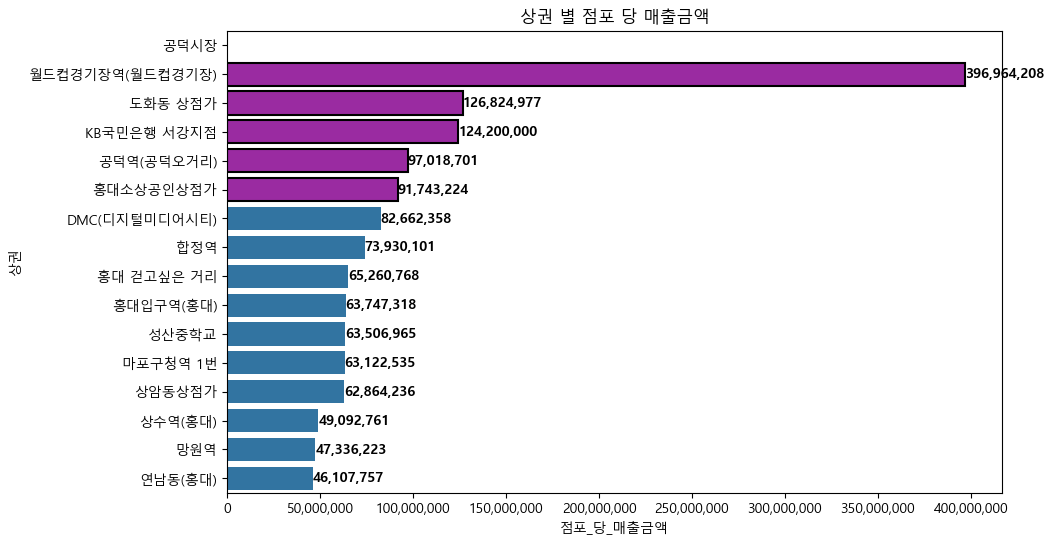

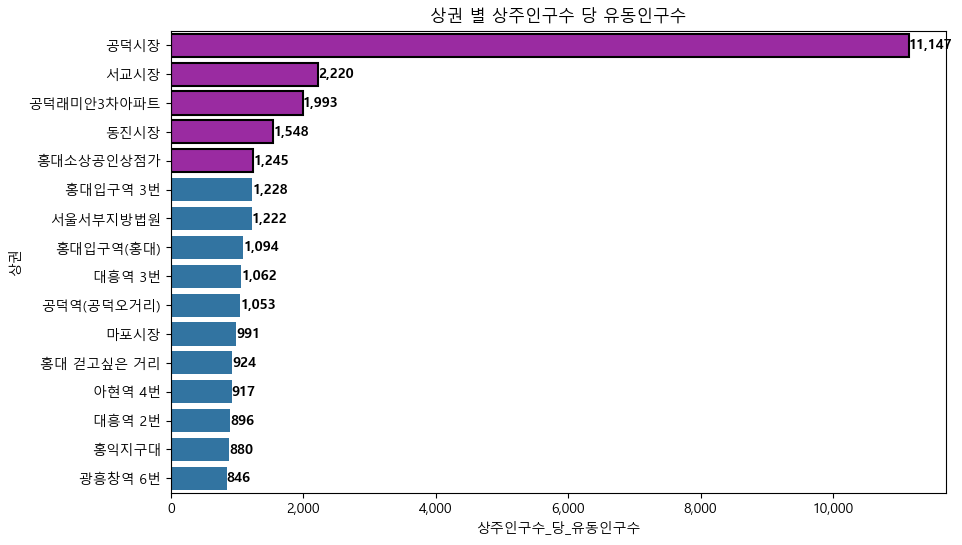

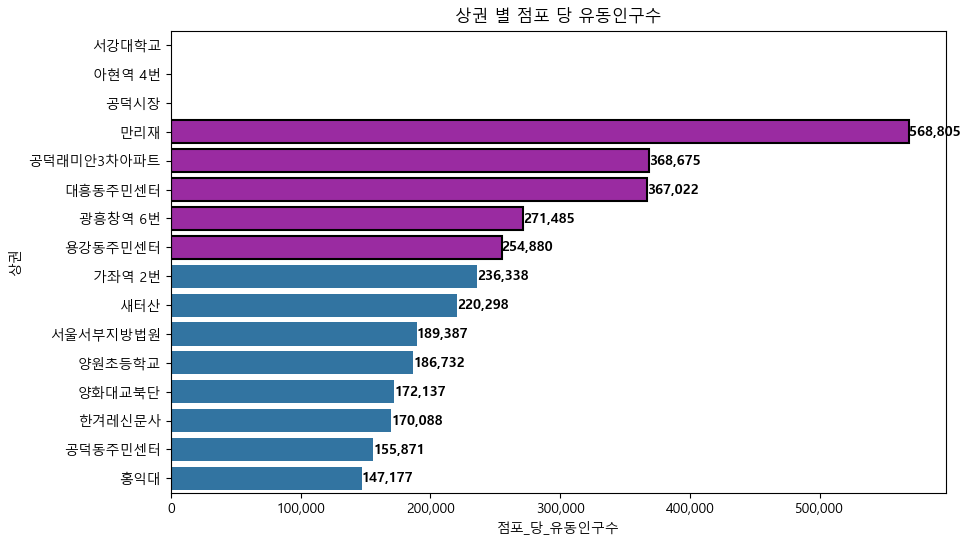

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import ticker

# 각 데이터프레임 및 필요한 정보를 리스트 형태로 준비
dataframes = [grouped_data_market] * 3
columns = ['점포_당_매출금액', '상주인구수_당_유동인구수', '점포_당_유동인구수']
titles = ['상권 별 점포 당 매출금액', '상권 별 상주인구수 당 유동인구수', '상권 별 점포 당 유동인구수']

# 각 데이터프레임에 대해 바 차트 생성
for df, col, title in zip(dataframes, columns, titles):
    plt.figure(figsize=(10, 6))
    barplot = sns.barplot(x=col, y='상권_코드_명', data=df, order=df.sort_values(col, ascending=False).head(16)['상권_코드_명'])
    plt.title(title)
    plt.xlabel(col)
    plt.ylabel('상권')
    plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    for i, bar in enumerate(barplot.patches):
        plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height() / 2,
                 f'{bar.get_width():,.0f}',
                 ha='left', va='center', fontweight='bold', color='black')
        if i < 5:
            bar.set_edgecolor('black')
            bar.set_linewidth(1.5)
            bar.set_facecolor('#9A2BA1')


    filename = f"{title}.png"
    plt.savefig(filename)
#      plt.close()

plt.show()

---

## 3. 지도 시각화

In [24]:
# 마포구 행정동 위경도 변환(EPSG 5181 > WGS84로)

# !pip install pyproj
from pyproj import Proj, Transformer

# 데이터 프레임 생성
dong_area = pd.DataFrame({
    '행정동_코드': [11440555, 11440565, 11440585, 11440700, 11440710, 11440720, 11440730,
                    11440740, 11440590, 11440600, 11440610, 11440630, 11440655, 11440660,
                    11440680, 11440690],
    '행정동_명': ['아현동', '공덕동', '도화동', '대흥동', '망원1동', '망원2동', '상암동', '서강동', 
                  '서교동', '성산1동', '성산2동', '신수동', '연남동', '염리동', '용강동', '합정동'],
    '엑스좌표_값': [195823, 196284, 195502, 191180, 193068, 192211, 191339, 189390,
                  194893, 194833, 195368, 194238, 193463, 193014, 191955, 191142],
    '와이좌표_값': [450258, 449979, 448794, 451056, 451501, 451389, 452092, 452361,
                  449115, 450283, 450041, 449573, 449693, 450583, 449720, 450460],
    '영역_면적': [744328, 1019197, 625018, 676411, 647438, 859254, 1978724, 8402415,
                790602, 858570, 491468, 797879, 1478577, 1678981, 1712389, 1101005]})

# EPSG:5181 (Korea Central Belt) 좌표계를 EPSG:4326 (WGS84) 좌표계로 변환하는 Transformer 생성
transformer = Transformer.from_crs('epsg:5181', 'epsg:4326', always_xy=True)

# 변환 실행
converted_coords = transformer.transform(dong_area['엑스좌표_값'].to_list(), dong_area['와이좌표_값'].to_list())

# 변환된 좌표를 데이터 프레임에 추가
dong_area['위도'] = converted_coords[1] # 위도는 두 번째 튜플 값
dong_area['경도'] = converted_coords[0] # 경도는 첫 번째 튜플 값

# 결과 데이터 프레임을 확인
dong_area

# dong_area.to_excel('./dong_area_위경도.xlsx')

,행정동_코드,행정동_명,엑스좌표_값,와이좌표_값,영역_면적,위도,경도
0,11440555,아현동,195823,450258,744328,37.551833,126.952730
1,11440565,공덕동,196284,449979,1019197,37.549321,126.957948
2,11440585,도화동,195502,448794,625018,37.538641,126.949106
3,11440700,대흥동,191180,451056,676411,37.558990,126.900176
4,11440710,망원1동,193068,451501,647438,37.563016,126.921540
5,11440720,망원2동,192211,451389,859254,37.562000,126.911842
6,11440730,상암동,191339,452092,1978724,37.568326,126.901964
7,11440740,서강동,189390,452361,8402415,37.570729,126.879899
8,11440590,서교동,194893,449115,790602,37.541530,126.942213
9,11440600,성산1동,194833,450283,858570,37.552053,126.941526


In [25]:
# 마포구 행정동 위경도 변환(EPSG 5181 > WGS84로)

# !pip install pyproj
from pyproj import Proj, Transformer

# EPSG:5181 (Korea Central Belt) 좌표계를 EPSG:4326 (WGS84) 좌표계로 변환하는 Transformer 생성
transformer = Transformer.from_crs('epsg:5181', 'epsg:4326', always_xy=True)

# 변환 실행
converted_coords = transformer.transform(dong_area['엑스좌표_값'].astype(float).to_list(),
                                         dong_area['와이좌표_값'].astype(float).to_list())

# 변환된 좌표를 데이터 프레임에 추가
dong_area['위도'] = converted_coords[1] # 위도는 두 번째 튜플 값
dong_area['경도'] = converted_coords[0] # 경도는 첫 번째 튜플 값

# 결과 데이터 프레임을 확인
dong_area.sort_values(by='행정동_명')

# 변환된 데이터를 Excel 파일로 저장
# dong_area.to_excel('./dong_area_위경도.xlsx, index=False')

,행정동_코드,행정동_명,엑스좌표_값,와이좌표_값,영역_면적,위도,경도
1,11440565,공덕동,196284,449979,1019197,37.549321,126.957948
3,11440700,대흥동,191180,451056,676411,37.558990,126.900176
2,11440585,도화동,195502,448794,625018,37.538641,126.949106
4,11440710,망원1동,193068,451501,647438,37.563016,126.921540
5,11440720,망원2동,192211,451389,859254,37.562000,126.911842
6,11440730,상암동,191339,452092,1978724,37.568326,126.901964
7,11440740,서강동,189390,452361,8402415,37.570729,126.879899
8,11440590,서교동,194893,449115,790602,37.541530,126.942213
9,11440600,성산1동,194833,450283,858570,37.552053,126.941526
10,11440610,성산2동,195368,450041,491468,37.549876,126.947582


In [26]:
# 마포구 상권 위경도 변환(EPSG 5181 > WGS84로)

from pyproj import Proj, Transformer

# EPSG:5181 (Korea Central Belt) 좌표계를 EPSG:4326 (WGS84) 좌표계로 변환하는 Transformer 생성
transformer = Transformer.from_crs('epsg:5181', 'epsg:4326', always_xy=True)

# 변환 실행
converted_coords = transformer.transform(market_area['엑스좌표_값'].astype(float).to_list(), 
                                         market_area['와이좌표_값'].astype(float).to_list())

# 변환된 좌표를 데이터 프레임에 추가
market_area['위도'] = converted_coords[1] # 위도는 두 번째 튜플 값
market_area['경도'] = converted_coords[0] # 경도는 첫 번째 튜플 값

# 결과 데이터 프레임 확인
market_area.sort_values(by='상권_코드_명')

# 변환된 데이터를 Excel 파일로 저장
# market_area.to_excel('./market_area_위경도.xlsx', index=False)

C:\Users\chm44\AppData\Local\Temp\ipykernel_29840\4110589839.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_area['위도'] = converted_coords[1] # 위도는 두 번째 튜플 값
C:\Users\chm44\AppData\Local\Temp\ipykernel_29840\4110589839.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_area['경도'] = converted_coords[0] # 경도는 첫 번째 튜플 값


,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,엑스좌표_값,와이좌표_값,자치구_코드,자치구_코드_명,행정동_코드,행정동_코드_명,영역_면적,위도,경도
1294,D,발달상권,3120098,DMC(디지털미디어시티),190266,453378,11440,마포구,11440740,상암동,347758,37.579902,126.889801
474,A,골목상권,3110547,KB국민은행 망원동지점,191646,451113,11440,마포구,11440700,망원2동,72666,37.559508,126.905450
484,A,골목상권,3110570,KB국민은행 서강지점,194258,449405,11440,마포구,11440630,신수동,24575,37.544139,126.935026
433,A,골목상권,3110553,가좌역 2번,192127,452064,11440,마포구,11440730,성산2동,83965,37.568081,126.910884
551,A,골목상권,3110558,경성고등학교,192565,451651,11440,마포구,11440720,성산1동,321532,37.564363,126.915846
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1579,R,전통시장,3130190,홍대소상공인상점가,193084,450375,11440,마포구,11440660,서교동,35891,37.552871,126.921732
568,A,골목상권,3110564,홍대입구역 3번,193428,451158,11440,마포구,11440660,서교동,49371,37.559928,126.925618
1100,D,발달상권,3120103,홍대입구역(홍대),192825,450117,11440,마포구,11440660,서교동,461923,37.550544,126.918803
578,A,골목상권,3110565,홍익대,193630,450369,11440,마포구,11440655,서강동,43573,37.552821,126.927911


In [27]:
# ##### 오래걸림 가급적 돌리지 말 것! #####

# # 마포구 학교, 학원, 대학원 위경도 변환(도로명주소 > WGS84로)

# # !pip install geopy
# import pandas as pd
# from geopy.geocoders import Nominatim

# # 파일 불러오기
# df1 = pd.read_csv('./data/서울시 마포구 학교 기본정보.csv', encoding='cp949')
# df2 = pd.read_csv('./data/서울시 마포구 학원 교습소정보.csv', encoding='cp949')
# df3 = pd.read_csv('./data/서울시 대학 및 전문대학 DB 정보 (한국어).csv', encoding='cp949')

# # df1 중복 제거
# df1 = df1.drop_duplicates(subset='학교명')

# # df3 필터링
# df3 = df3[df3['행정구'] == '마포구']

# # 위도, 경도 변환 함수
# geo_local = Nominatim(user_agent='South Korea')

# def geocoding_lat(address):
#     try:
#         geo = geo_local.geocode(address)
#         return geo.latitude
#     except:
#         return 0

# def geocoding_lon(address):
#     try:
#         geo = geo_local.geocode(address)
#         return geo.longitude
#     except:
#         return 0

# # 데이터프레임에 위도, 경도 컬럼 추가
# for df in [df1, df2, df3]:
#     df['위도'] = df['도로명주소'].apply(geocoding_lat)
#     df['경도'] = df['도로명주소'].apply(geocoding_lon)
    
# # # CSV 파일로 저장
# df1.to_csv('./서울시 마포구 학교 기본정보_위경도.csv', encoding='cp949', index=False)
# df2.to_csv('./서울시 마포구 학원 교습소정보_위경도.csv', encoding='cp949', index=False)
# df3.to_csv('./서울시 대학 및 전문대학 DB 정보_위경도.csv', encoding='cp949', index=False)

In [28]:
# 마포구 내 16개 행정동 경계 및 동 이름 표시

import requests
import folium
from folium import Circle

seoul_geojson_url = 'https://raw.githubusercontent.com/youngwoos/Doit_Python/main/Data/EMD_Seoul.geojson'
seoul_geojson_data = requests.get(seoul_geojson_url).json()

# 마포구 내 16개 행정동만 표시
required_dongs = ['아현동', '공덕동', '도화동', '대흥동', '망원1동', '망원2동', '상암동', '서강동', 
                  '서교동', '성산1동', '성산2동', '신수동', '연남동', '염리동', '용강동', '합정동']

filtered_features = [
    feature for feature in seoul_geojson_data['features']
    if feature['properties']['ADM_DR_NM'] in required_dongs]

filtered_geojson = {
    'type': 'FeatureCollection',
    'features': filtered_features}

seoul_map_filtered = folium.Map(location=[37.55931349, 126.90827], zoom_start=13)

folium.GeoJson(
    filtered_geojson,
    name='Selected Administrative Dong Boundaries').add_to(seoul_map_filtered)

# 동 이름 지도에 표시
coordinates = {
    '아현동' : (37.55183309, 126.9527298),
    '공덕동' : (37.54932128, 126.9579482),
    '도화동' : (37.53864096, 126.9491061),
    '망원2동' : (37.55899031, 126.9001764),
    '연남동' : (37.56301588, 126.9215403),
    '성산1동' : (37.56199992, 126.9118416),
    '성산2동' : (37.56832613, 126.9019637),
    '상암동' : (37.57072942, 126.8798986),
    '용강동' : (37.54152999, 126.9422131),
    '대흥동' : (37.55205332, 126.941526),
    '염리동' : (37.54987575, 126.947582),
    '신수동' : (37.54565271, 126.934798),
    '서강동' : (37.54672874, 126.9260272),
    '서교동' : (37.55474433, 126.9209378),
    '합정동' : (37.54696009, 126.9089624),
    '망원1동' : (37.55362001, 126.8997535)}

for dong_name, (lat, lon) in coordinates.items():
    folium.Marker(
        location=(lat, lon), 
        icon=folium.DivIcon(
            icon_size=(150,36),
            icon_anchor=(75,0),
            html=f'<div style="font-size: 10pt; text-align: center;">{dong_name}</div>',
        )
    ).add_to(seoul_map_filtered)    
    
    
    
# 학교, 학원, 대학교 지도에 표시
df1 = pd.read_csv('./서울시 마포구 학교 기본정보_위경도.csv', encoding='cp949')
df2 = pd.read_csv('./서울시 마포구 학원 교습소정보_위경도.csv', encoding='cp949')
df3 = pd.read_csv('./서울시 대학 및 전문대학 DB 정보_위경도.csv', encoding='cp949')

# df1 데이터 (학교) 파란색 점으로 표시
for index, row in df1.iterrows():
    folium.CircleMarker(
        location=[row['위도'], row['경도']],
        radius=5,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=1,
        popup=row['학교명']
    ).add_to(seoul_map_filtered)

# df2 데이터 (학원) 초록색 점으로 표시
for index, row in df2.iterrows():
    folium.CircleMarker(
        location=[row['위도'], row['경도']],
        radius=1,
        color='green',
        fill=True,
        fill_color='green',
        fill_opacity=1,
        popup=row['학원명']
    ).add_to(seoul_map_filtered)

# df3 데이터 (대학 및 전문대학) 노란색 점으로 표시
for index, row in df3.iterrows():
    folium.CircleMarker(
        location=[row['위도'], row['경도']],
        radius=10,
        color='yellow',
        fill=True,
        fill_color='yellow',
        fill_opacity=1,
        popup=row['학교명']
    ).add_to(seoul_map_filtered)
    
seoul_map_filtered